# TensorFlow 2 quickstart for beginners

In [ ]:
import tensorflow as tf

Load and prepare the Fashion MNIST dataset. Convert the samples from integers to floating-point numbers:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:20000] / 255., X_train_full[20000:] / 255.
y_valid, y_train = y_train_full[:20000], y_train_full[20000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

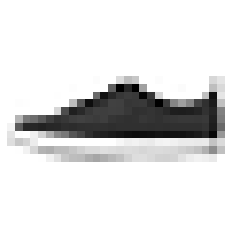

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
X_train.shape

(40000, 28, 28)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Sneaker'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(20000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

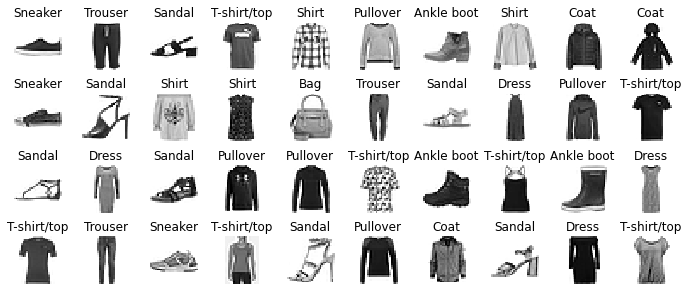

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [ ]:
model =  tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(128,activation='relu'),
                              tf.keras.layers.Dense(10,activation='softmax')                         
                              ])

For each example the model returns a vector of probabilities one for each class.

In [ ]:
predictions = model.predict(X_train[:1])
predictions

array([[0.16805372, 0.12816294, 0.12815289, 0.0499231 , 0.11592059,
        0.08261891, 0.08462517, 0.07071089, 0.07986294, 0.09196882]],
      dtype=float32)

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.6491556

In [ ]:
model.compile(optimizer='adam',loss=loss_fn,metrics=[tf.keras.metrics.sparse_categorical_accuracy])

Now the model is buit

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_139 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_140 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Let's visualize the model 

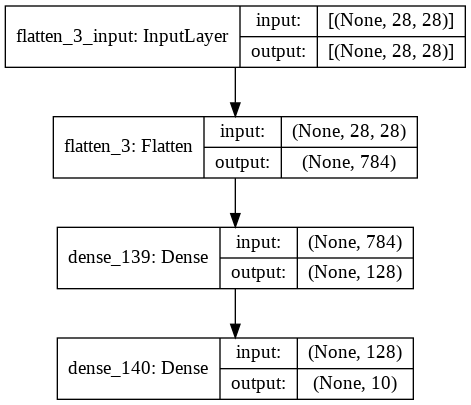

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
my_layer = model.layers[1]
my_layer.name

'dense_139'

In [ ]:
model.get_layer('dense_139')

In [ ]:
weights, biases = my_layer.get_weights()

In [ ]:
weights

array([[-0.00016596, -0.0414476 , -0.0358878 , ...,  0.04606403,
        -0.05129403,  0.04131245],
       [ 0.03720416, -0.01660601,  0.03161578, ..., -0.05368289,
        -0.00862242, -0.00875636],
       [-0.00802889,  0.07661093,  0.07943774, ..., -0.03623539,
        -0.06366895,  0.01890719],
       ...,
       [-0.01949655, -0.06227925,  0.04021171, ...,  0.00373819,
        -0.01294355,  0.01160781],
       [-0.04376364, -0.01536641, -0.03813745, ...,  0.03439593,
         0.03185172, -0.0658362 ],
       [ 0.03200429, -0.07269503, -0.00184433, ...,  0.02345732,
         0.07415842, -0.00728122]], dtype=float32)

In [ ]:
weights.shape

(784, 128)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
biases.shape

(128,)

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6791 - sparse_categorical_accuracy: 0.7685 - val_loss: 0.4739 - val_sparse_categorical_accuracy: 0.8328
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4146 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.3792 - val_sparse_categorical_accuracy: 0.8659
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3585 - sparse_categorical_accuracy: 0.8712 - val_loss: 0.3566 - val_sparse_categorical_accuracy: 0.8707
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3283 - sparse_categorical_accuracy: 0.8807 - val_loss: 0.3561 - val_sparse_categorical_accuracy: 0.8697
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3061 - sparse_categorical_accuracy: 0.8907 - val_loss: 0.3385 - val_sparse_categorical_accuracy: 0.8748
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2897 - spars

In [ ]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

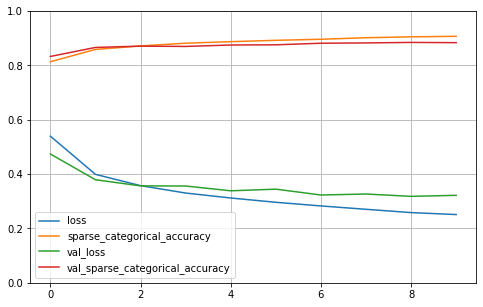

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
import numpy as np
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
import numpy as np
y_pred = np.argmax(model.predict(X_test), axis=-1)

from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,y_pred)
acc

0.8764

The image classifier is now trained to ~88% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

Building an autoencoder using functional API

In [ ]:

X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])
X_valid = X_valid.reshape(-1,X_valid.shape[1]*X_valid.shape[2])

In [ ]:
X_train.shape

(40000, 784)

In [ ]:
from tensorflow.keras.layers import Dense,  Input
from tensorflow.keras.models import Model
input_img = Input(shape=(X_train.shape[1]))

# Ecoding
x=Dense(512,activation='relu')(input_img)
encoded=Dense(32,activation='relu')(x)


# Decoding
x=Dense(512,activation='relu')(encoded)
decoded=Dense(X_train.shape[1],activation='linear')(x)


In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_145 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_146 (Dense)            (None, 32)                16416     
_________________________________________________________________
dense_147 (Dense)            (None, 512)               16896     
_________________________________________________________________
dense_148 (Dense)            (None, 784)               402192    
Total params: 837,424
Trainable params: 837,424
Non-trainable params: 0
_________________________________________________________________


Reduce dimensionality

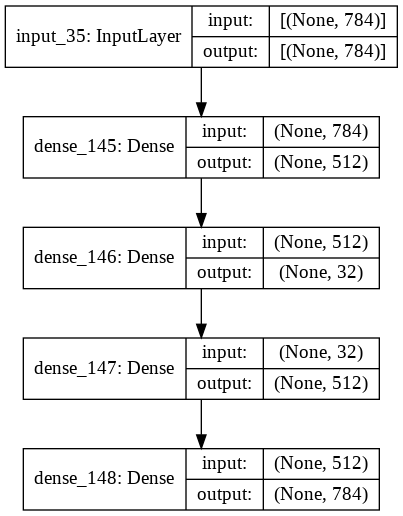

In [ ]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

In [ ]:
autoencoder.fit(X_train, X_train, epochs = 30, batch_size = 64,validation_data=(X_valid, X_valid))

Epoch 1/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0379 - val_loss: 0.0171
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0164 - val_loss: 0.0153
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0149 - val_loss: 0.0144
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0140 - val_loss: 0.0137
Epoch 5/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0128 - val_loss: 0.0129
Epoch 8/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 9/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0124 - val_loss: 0.0126
Epoch 10/30
625/625 [==============================] - 2s 3ms/step - loss: 0.0123 - val_loss: 0.0124

In [ ]:
# iteratr over layers
for i,layer in enumerate(autoencoder.layers):
  print(i,layer.name)


0 input_35
1 dense_145
2 dense_146
3 dense_147
4 dense_148


In [ ]:
X_train.shape

(40000, 784)

In [ ]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
reduced_X_train=encoder.predict(X_train)

In [ ]:
reduced_X_train.shape

(40000, 32)

In [ ]:
from sklearn import manifold

tsne=manifold.TSNE(n_components=2)
tY=tsne.fit_transform(reduced_X_train[0:5000])


In [ ]:
y_train.shape

(40000,)

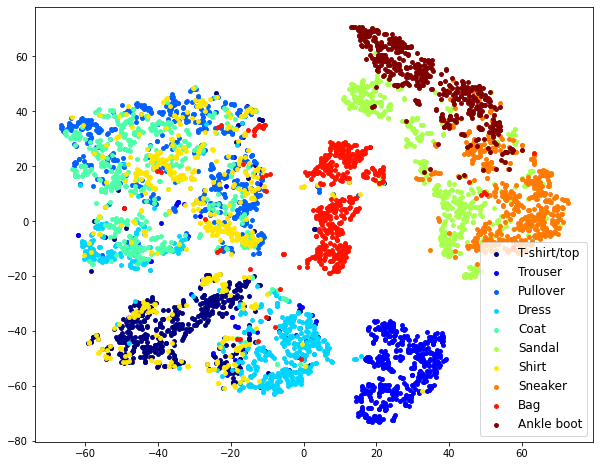

In [ ]:
classes=np.array(list(class_names))
# classes=np.unique(y_train2)
# classes=classes.astype(np.int)

y_train2=y_train[0:5000]

jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,np.size(classes))))
plt.figure(figsize=(10,8))
for i in range(np.size(classes)):
    
    
    plt.scatter(tY[y_train2==i,0],tY[y_train2==i,1],color=next(colors),label=classes[i],s=15)
    
plt.legend(fontsize='large')
# plt.savefig('nested_projections.eps', format='eps',dpi=1200)
# plt.savefig('nested_projections.png', format='eps',dpi=1200)

plt.show()


In [ ]:
from tensorflow.keras.layers import Dense,  Input
from tensorflow.keras.models import Model
input_img = Input(shape=(X_train.shape[1]))

# Ecoding
x = Dense(512,  activation='relu')(input_img)

encoded =  Dense(32,  activation='relu')(x)

supervision=Dense(10,  activation='softmax', name="classifier")(encoded)
# Decoding
x = Dense(512,  activation='relu')(encoded)
decoded =  Dense(X_train.shape[1],  activation='linear',name="reconstrunction")(x)

autoencoder = Model(input_img, outputs=[decoded,supervision])

loss_fn=tf.keras.losses.MeanSquaredError()

loss_fn2 = tf.keras.losses.SparseCategoricalCrossentropy()


autoencoder.compile(optimizer='adam', loss=[loss_fn,loss_fn2] ,loss_weights=[0.5, .5])
autoencoder.summary()




Model: "model_45"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_152 (Dense)               (None, 512)          401920      input_37[0][0]                   
__________________________________________________________________________________________________
dense_153 (Dense)               (None, 32)           16416       dense_152[0][0]                  
__________________________________________________________________________________________________
dense_154 (Dense)               (None, 512)          16896       dense_153[0][0]                  
___________________________________________________________________________________________

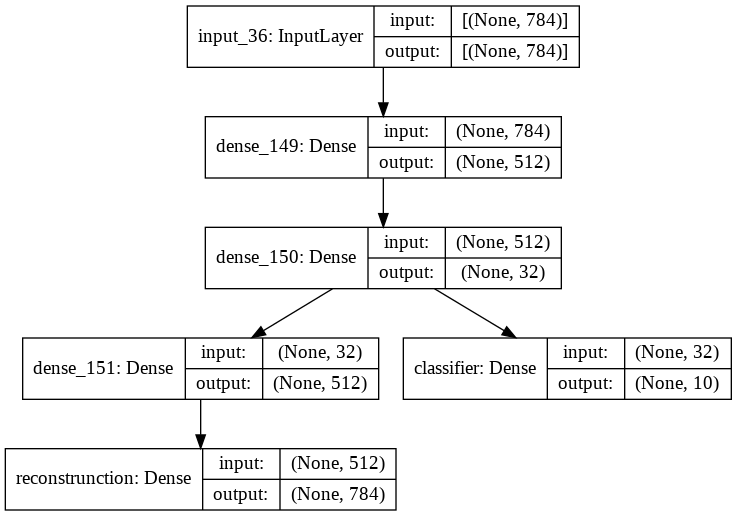

In [ ]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

In [ ]:

history = autoencoder.fit(X_train, [X_train, y_train], epochs = 50, batch_size = 64 ,validation_data=(X_valid, [X_valid, y_valid]))


Epoch 1/50
625/625 [==============================] - 3s 4ms/step - loss: 0.3710 - reconstrunction_loss: 0.0461 - classifier_loss: 0.6959 - val_loss: 0.2127 - val_reconstrunction_loss: 0.0249 - val_classifier_loss: 0.4005
Epoch 2/50
625/625 [==============================] - 2s 4ms/step - loss: 0.2084 - reconstrunction_loss: 0.0237 - classifier_loss: 0.3930 - val_loss: 0.1993 - val_reconstrunction_loss: 0.0224 - val_classifier_loss: 0.3762
Epoch 3/50
625/625 [==============================] - 2s 4ms/step - loss: 0.1819 - reconstrunction_loss: 0.0219 - classifier_loss: 0.3419 - val_loss: 0.1953 - val_reconstrunction_loss: 0.0213 - val_classifier_loss: 0.3694
Epoch 4/50
625/625 [==============================] - 2s 3ms/step - loss: 0.1686 - reconstrunction_loss: 0.0210 - classifier_loss: 0.3162 - val_loss: 0.1793 - val_reconstrunction_loss: 0.0211 - val_classifier_loss: 0.3376
Epoch 5/50
625/625 [==============================] - 2s 3ms/step - loss: 0.1568 - reconstrunction_loss: 0.0205 

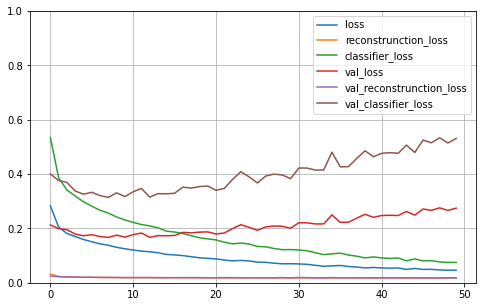

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:

for i,layer in enumerate(autoencoder.layers):
    
    print(i,layer.name)




0 input_33
1 dense_136
2 dense_137
3 dense_138
4 reconstrunction
5 classifier


In [ ]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
reduced_X_train=encoder.predict(X_train)

In [ ]:
reduced_X_train.shape

(40000, 32)

In [ ]:
from sklearn import manifold

tsne=manifold.TSNE(n_components=2)
tY=tsne.fit_transform(reduced_X_train[0:5000])

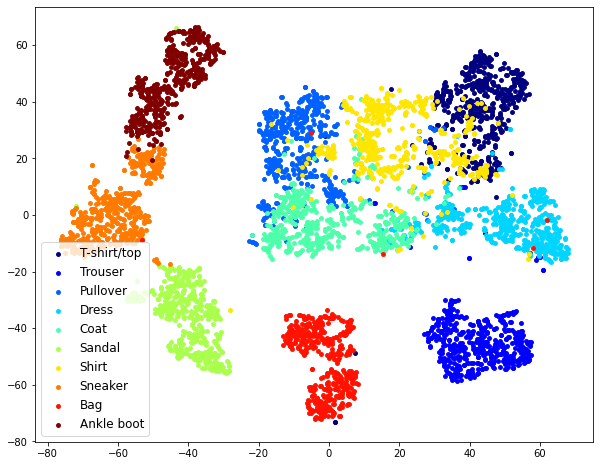

In [ ]:
classes=np.array(list(class_names))
# classes=np.unique(y_train2)
# classes=classes.astype(np.int)

y_train2=y_train[0:5000]

jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,np.size(classes))))
plt.figure(figsize=(10,8))
for i in range(np.size(classes)):
    
    
    plt.scatter(tY[y_train2==i,0],tY[y_train2==i,1],color=next(colors),label=classes[i],s=15)
    
plt.legend(fontsize='large')
# plt.savefig('nested_projections.eps', format='eps',dpi=1200)
# plt.savefig('nested_projections.png', format='eps',dpi=1200)

plt.show()
